In [13]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

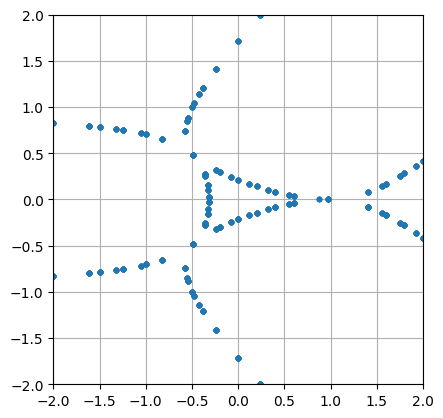

In [14]:
data = pd.read_csv('./original_phase_diagram.csv')
data.drop_duplicates()
x = data['x']
y = data['y']
plt.plot(x,y,'.')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()

In [15]:
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

drop_idx_1 = [86,88]
for i, point in points.iterrows():
    if point[0]>-0.3:
        drop_idx_1.append(i)
    elif point[1]>0.825081:
        drop_idx_1.append(i)
    elif point[1]<-0.825081:
        drop_idx_1.append(i)
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')
lst_1 = first_part.index.to_list()

drop_idx_2 = []
drop_idx_2.extend(lst_1)
for i, point in points.iterrows():
    if point[0]>1 or point[0]<-1:
        drop_idx_2.append(i)
drop_idx_2.remove(120)
drop_idx_2.remove(122)
second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')
lst_2 = second_part.index.to_list()

drop_idx_3 =[]
for i, point in points.iterrows():
    if point[0]<0.7:
        drop_idx_3.append(i)
third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')


/tmp/ipykernel_6621/1366117000.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if point[0]>-0.3:
/tmp/ipykernel_6621/1366117000.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]>0.825081:
/tmp/ipykernel_6621/1366117000.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]<-0.825081:
/tmp/ipykernel_6621/1366117000.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

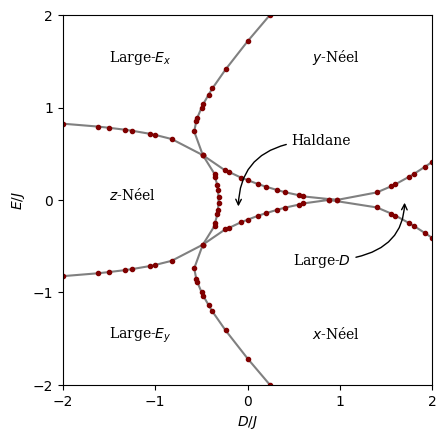

In [16]:
x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')
plt.plot(x1,y1,'.', color = 'maroon')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')
plt.plot(x2, y2, '.', color = 'maroon')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')
plt.plot(x3, y3, '.', color = 'maroon')
plt.axis('square')
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.text(x=-1.5, y=-1.5, s='Large-$E_y$', fontdict={'family': 'serif'})
plt.text(x = -1.5, y = 0, s = '$z$-Néel', fontdict={'family': 'serif'})
plt.text(x = -1.5, y = 1.5, s = 'Large-$E_x$', fontdict={'family': 'serif'})
plt.text(x = .7, y = -1.5, s = '$x$-Néel', fontdict={'family': 'serif'})
plt.text(x = .7, y = 1.5, s = '$y$-Néel', fontdict={'family': 'serif'})
plt.annotate('Haldane',xy=(-.1,-.1), xytext=(0.8,0.6), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
plt.annotate('Large-$D$', xy = (1.7,0), xytext=(.8,-.7), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
plt.savefig('Original_phase_diagram.png', dpi=1000)
plt.show()

The process of making dataset

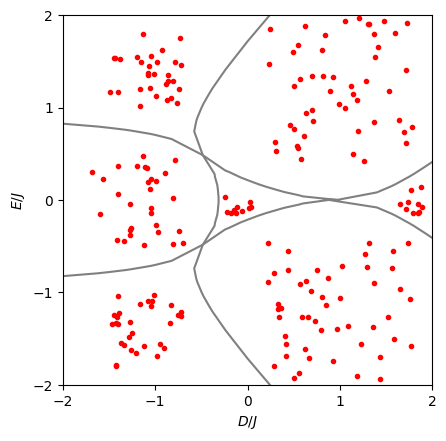

In [19]:
x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')


np.random.seed(0)
def get_random_points(num_points, x, y, r):
    x = np.random.uniform(x-r, x+r, num_points)
    y = np.random.uniform(y-r, y+r, num_points)
    return x, y

phase_points = [
    (-1.1, 1.4),  # 0: Large-Ex
    (-1.1, -1.4), # 1: Large-Ey
    (-1.2, 0.0),  # 2: z-Neel
    (1, 1.2),   # 3: y-Neel
    (1, -1.2),  # 4: x-Neel
    (1.75, 0.0),   # 5: Large-D
    (-0.1, 0.0),   # 6: Haldane
]

feature_x = []
feature_y = []
target_points = []

def data(i, x, y, num_points):
    [target_points.append(i) for _ in range(num_points)]
    feature_x.extend(x.tolist())
    feature_y.extend(y.tolist())
         
for i, point in enumerate(phase_points):
    x, y = point
    if i == 0:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.4)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 1:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.4)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 2:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.5)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 3:
        x_list, y_list = get_random_points(num_points=50, x=x, y=y, r=0.8)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=50)
    elif i == 4:
        x_list, y_list = get_random_points(num_points=50, x=x, y=y, r=0.8)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=50)
    elif i == 5:
        x_list, y_list = get_random_points(num_points=10, x=x, y=y, r=0.15)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=10)
    elif i == 6:
        x_list, y_list = get_random_points(num_points=10, x=x, y=y, r=0.15)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=10)



plt.axis('square')  
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.savefig('Original_phase_diagram_with_random_points.png')
plt.show()

In [20]:
pd.DataFrame({'x': feature_x, 'y': feature_y, 'target': target_points}).to_csv('random_train_dataset.csv', index=False)

In [21]:
a  = pd.read_csv('random_train_dataset.csv')